Importing the Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
from xgboost import XGBRegressor

In [7]:
housing=pd.read_csv('Housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
#Checking the number of rows and column in the data frame
housing.shape

(506, 14)

In [9]:
#rename the column MEDV to Price
housing.rename(columns={"MEDV":"Price"}, inplace=True)

In [10]:
# To see the columns
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [11]:
#check for null values
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [12]:
#summary of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
#statistical summary of dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correltion between various features in the dataset

1.Positive Correlation
2.Negative Correlation

In [14]:
correlation=housing.corr()

<AxesSubplot:>

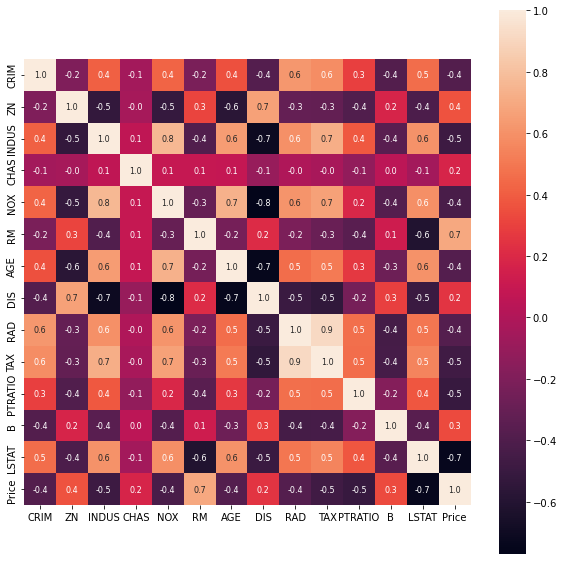

In [15]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8})

Spliting the data and target

In [16]:
x=housing.drop(['Price'],axis=1)
y=housing['Price']

In [17]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

Spliting the data into training and test data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Model Training

XGBoost Regressor

In [20]:
#loading the model
model=XGBRegressor()

In [21]:
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Model Evaluation

Prediction on training data

In [22]:
#accuracy for prediction on training data
training_data_prediction=model.predict(x_train)

In [23]:
training_data_prediction

array([23.147501 , 20.99463  , 20.090284 , 34.69053  , 13.903663 ,
       13.510157 , 21.998634 , 15.1940975, 10.899711 , 22.709627 ,
       13.832816 ,  5.592794 , 29.810236 , 49.99096  , 34.89215  ,
       20.607384 , 23.351097 , 19.23555  , 32.695698 , 19.641418 ,
       26.991022 ,  8.401829 , 46.00729  , 21.708961 , 27.062933 ,
       19.321356 , 19.288303 , 24.809872 , 22.61626  , 31.70493  ,
       18.542515 ,  8.697379 , 17.395294 , 23.700663 , 13.304856 ,
       10.492197 , 12.688369 , 25.016556 , 19.67495  , 14.902088 ,
       24.193798 , 25.007143 , 14.900281 , 16.995798 , 15.6009035,
       12.699232 , 24.51537  , 14.999952 , 50.00104  , 17.525454 ,
       21.184624 , 31.998049 , 15.613355 , 22.89754  , 19.325378 ,
       18.717896 , 23.301125 , 37.222923 , 30.09486  , 33.102703 ,
       21.00072  , 49.999332 , 13.405827 ,  5.0280113, 16.492886 ,
        8.405072 , 28.64328  , 19.499939 , 20.586452 , 45.402164 ,
       39.79833  , 33.407326 , 19.83506  , 33.406372 , 25.2714

In [24]:
# R squared error
score_1=metrics.r2_score(y_train,training_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)

print("R Squared error:",score_1)
print(" Mean Absolute Error",score_2)

R Squared error: 0.9999948236320982
 Mean Absolute Error 0.0145848437110976


Visualizing the actual prices and predicted prices

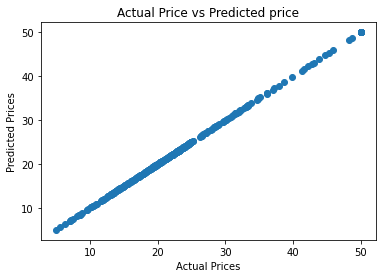

In [25]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted price")
plt.show()

Prediction on test data

In [26]:
test_data_prediction=model.predict(x_test)

In [27]:
# R squared error
score_1=metrics.r2_score(y_test,test_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)

print("R Squared error:",score_1)
print(" Mean Absolute Error",score_2)

R Squared error: 0.8711660369151691
 Mean Absolute Error 2.2834744154238233
